**Práctica integradora**

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

**Análisis exploratorio de datos (EDA) antes de entrenar un modelo**

In [2]:
# Cargar el conjunto de datos
df = pd.read_csv('Airline Dataset.csv')

# Visualizar las primeras filas del conjunto de datos
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

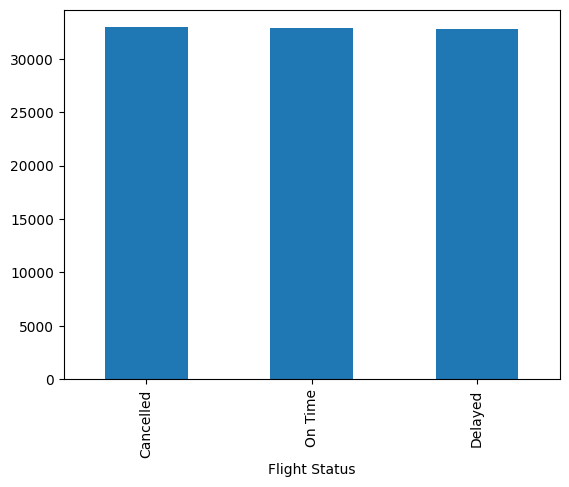

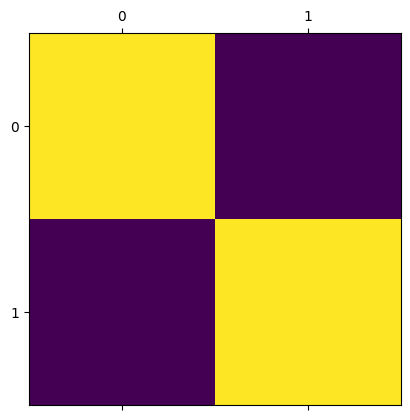

In [3]:
# Ver la información general del conjunto de datos (tipos de datos, número de valores no nulos, etc.)
print(df.info())

# Ver estadísticas descriptivas del conjunto de datos
print(df.describe())

# Ver la distribución de la variable objetivo 'Flight Status'
df['Flight Status'].value_counts().plot(kind='bar')
plt.show()

# Seleccionar solo las columnas numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

# Calcular la correlación entre las columnas numéricas
plt.matshow(df_numeric.corr())
plt.show()

In [4]:
# Dividir el conjunto de datos en características (X) y etiqueta objetivo (y)
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Selección de características**

In [6]:
# Crear un codificador
le = LabelEncoder()

# Ajustar el codificador en todo el conjunto de datos
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Dividir el conjunto de datos en características (X) y etiqueta objetivo (y)
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
selector = SelectKBest(k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

**Entrenamiento del modelo**

In [8]:
model = RandomForestClassifier()
model.fit(X_train_new, y_train)

RandomForestClassifier()

**Cálculo de métricas**

In [20]:
#Calculo de métrcias "Precision","Recall" y "F1-score" 
y_pred = model.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34      6446
           1       0.33      0.32      0.33      6655
           2       0.33      0.31      0.32      6623

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.33     19724



Metricas de rendimiento para un modelo de clasificación. 

Análisis:

Clase 0:

Precisión: 0.33, lo que significa que cuando el modelo predice la clase 0, es correcto aproximadamente el 33% de las veces.
Recall: 0.36, lo que significa que el modelo identifica correctamente el 36% de todas las instancias reales de la clase 0.
F1-score: 0.34, es una medida que combina precisión y recall en un solo número. Un F1-score más alto es mejor, y un F1-score perfecto es 1.
Soporte: 6446, lo que significa que hay 6446 instancias de la clase 0 en el conjunto de datos de prueba.
Clase 1:

Las métricas son similares a las de la clase 0, con una precisión, recall y F1-score de alrededor del 33%. El soporte es ligeramente mayor a 6655.
Clase 2:

Nuevamente, las métricas son similares a las otras clases, con una precisión, recall y F1-score de alrededor del 33%. El soporte es ligeramente menor a 6623.
Promedios:

La precisión, recall y F1-score promedio para todas las clases también son alrededor del 33%, tanto para el promedio macro (que trata todas las clases por igual) como para el promedio ponderado (que da más peso a las clases con más instancias).
En general, parece que el modelo no está realizando muy bien ya que todas las métricas están alrededor del 33%, lo cual es cercano a una predicción aleatoria en un problema de clasificación de tres clases. Podrías considerar ajustar el modelo o usar un tipo diferente de modelo para mejorar estas métricas.

**Generar conclusiones**

Para analizar el rendimiento del modelo, se puede utilizar varias métricas dependiendo del problema específico que estés tratando de resolver. Algunas métricas comunes incluyen la precisión, la exhaustividad, el puntaje F1 y el área bajo la curva ROC (AUC-ROC). Puedes calcular estas métricas utilizando las funciones correspondientes en sklearn.metrics después de hacer predicciones en tu conjunto de prueba.

Ejemplo de cómo podrías entrenar un GradientBoostingClassifier

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train_new, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_new)

# Calcular métricas
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.45      0.38      6446
           1       0.34      0.23      0.28      6655
           2       0.33      0.32      0.33      6623

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.33     19724



El informe de clasificación en el calculo de métricas, muestra que el modelo tiene una precisión, recall y f1-score de alrededor del 33% para todas las clases, lo cual sugiere que el modelo no está funcionando muy bien.

Una alternativa podría ser probar un modelo de Support Vector Machine (SVM), que es un algoritmo de aprendizaje supervisado muy efectivo para problemas de clasificación y regresión. Aquí se genera un ejemplo de cómo podrías usar un SVC (Support Vector Classifier) con sklearn:

**SVM Support Vector Machine | Modelo de aprendizaje automático de Vectores de Soporte**

In [13]:
from sklearn.svm import SVC

# Crear el modelo
model = SVC()

# Entrenar el modelo
model.fit(X_train_new, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_new)

# Calcular métricas
print(classification_report(y_test, y_pred))


SVM no se ejecuta ya que consume demasiados recursos.

A tener en cuenta que los SVM pueden ser computacionalmente costosos para conjuntos de datos grandes y pueden requerir un ajuste cuidadoso de los parámetros. También se podría considerar probar otros algoritmos de clasificación, como K-Nearest Neighbors (KNN) o Naive Bayes, o usar técnicas de optimización de hiperparámetros para mejorar el rendimiento del modelo actual.

**K-Nearest Neighbors (KNN)** | k vecinos mas cercanos | Clasificador de aprendizaje supervisado no parametrico

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
model.fit(X_train_new, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_new)

# Calcular métricas
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.32      0.48      0.39      6446
           1       0.34      0.26      0.29      6655
           2       0.34      0.26      0.29      6623

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.32     19724



Analisis del Alogartimo KNN:

Clase 0:

Precisión: 0.32, lo que significa que cuando el modelo predice la clase 0, es correcto aproximadamente el 32% de las veces.
Recall: 0.48, lo que significa que el modelo identifica correctamente el 48% de todas las instancias reales de la clase 0.
F1-score: 0.39, es una medida que combina precisión y recall en un solo número. Un F1-score más alto es mejor, y un F1-score perfecto es 1.
Soporte: 6446, lo que significa que hay 6446 instancias de la clase 0 en el conjunto de datos de prueba.

Clase 1:
Las métricas son similares a las de la clase 0, con una precisión y F1-score de alrededor del 34%. Sin embargo, el recall es más bajo a 0.26. El soporte es ligeramente mayor a 6655.

Clase 2:
Nuevamente, las métricas son similares a las otras clases, con una precisión y F1-score de alrededor del 34%. Al igual que con la clase 1, el recall es más bajo a 0.26. El soporte es ligeramente menor a 6623.

Promedios:
La precisión y F1-score promedio para todas las clases son alrededor del 33%, tanto para el promedio macro (que trata todas las clases por igual) como para el promedio ponderado (que da más peso a las clases con más instancias). Sin embargo, la precisión ponderada es ligeramente menor a 0.32.

**Naive Bayes | Clasificador de aprendizaje superviosaro basado en el Teorema de Bayes, busca modelar la distribucion de las entradas de una clase o categoría dada**

In [11]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train_new, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_new)

# Calcular métricas
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.49      0.39      6446
           1       0.31      0.04      0.07      6655
           2       0.33      0.47      0.39      6623

    accuracy                           0.33     19724
   macro avg       0.32      0.33      0.28     19724
weighted avg       0.32      0.33      0.28     19724



El algoritmo Naive Bayes hace un par de suposiciones clave, lo que le da el título de “ingenuo” o “naive”. Asume que los predictores en un modelo Naive Bayes son condicionalmente independientes, es decir, no están relacionados con ninguna otra característica en el modelo. También asume que todas las características contribuyen igualmente al resultado.

A pesar de su diseño simple y sus suposiciones aparentemente simplificadas, los clasificadores Naive Bayes han funcionado bastante bien en muchas situaciones del mundo real complejas. Son altamente escalables, requiriendo un número de parámetros lineal en el número de variables (características/predictores) en un problema de aprendizaje.

**Optimización de hiperparámetros (usando GridSearchCV con RandomForestClassifier como ejemplo)**

In [12]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que se probaran
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo
model = RandomForestClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Entrenar el modelo
grid_search.fit(X_train_new, y_train)

# Ver los mejores parámetros encontrados por GridSearchCV
print(grid_search.best_params_)

# Hacer predicciones en el conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test_new)

# Calcular métricas
print(classification_report(y_test, y_pred))


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.32      0.35      0.34      6446
           1       0.33      0.31      0.32      6655
           2       0.33      0.31      0.32      6623

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.33     19724



Análisis:

- **Parámetros del modelo**: Los parámetros utilizados para el modelo son `max_depth` de 20, `min_samples_split` de 2 y `n_estimators` de 50. Estos parámetros son típicos de un modelo de bosque aleatorio.

- **Clase 0**: 
  - **Precisión**: 0.32, lo que significa que cuando el modelo predice la clase 0, es correcto aproximadamente el 32% de las veces.
  - **Recall**: 0.35, lo que significa que el modelo identifica correctamente el 35% de todas las instancias reales de la clase 0.
  - **F1-score**: 0.34, es una medida que combina precisión y recall en un solo número. Un F1-score más alto es mejor, y un F1-score perfecto es 1.
  - **Soporte**: 6446, lo que significa que hay 6446 instancias de la clase 0 en el conjunto de datos de prueba.

- **Clase 1**:
  - Las métricas son similares a las de la clase 0, con una precisión y F1-score de alrededor del 33%. Sin embargo, el recall es ligeramente menor a 0.31. El soporte es ligeramente mayor a 6655.

- **Clase 2**:
  - Nuevamente, las métricas son similares a las otras clases, con una precisión y F1-score de alrededor del 33%. Al igual que con la clase 1, el recall es ligeramente menor a 0.31. El soporte es ligeramente menor a 6623.

- **Promedios**:
   - La precisión, recall y F1-score promedio para todas las clases son alrededor del 33%, tanto para el promedio macro (que trata todas las clases por igual) como para el promedio ponderado (que da más peso a las clases con más instancias).

En general, parece que el modelo no está realizando muy bien ya que todas las métricas están alrededor del 33%, lo cual es cercano a una predicción aleatoria en un problema de clasificación de tres clases. Podrías considerar ajustar los parámetros del modelo o usar un tipo diferente de modelo para mejorar estas métricas.

El modelo de clasificación que se ha entrenado no está funcionando muy bien. Todas las métricas de rendimiento, incluyendo precisión, recall y F1-score, están alrededor del 33% para todas las clases. Esto es cercano a lo que esperaríamos de un modelo que hace predicciones aleatorias en un problema de clasificación de tres clases.

Los parámetros utilizados para el modelo son `max_depth` de 20, `min_samples_split` de 2 y `n_estimators` de 50. Se podría considerar ajustar estos parámetros o probar ualgún tipo diferente de modelo para mejorar el rendimiento.

Además, el recall para las clases 1 y 2 es particularmente bajo (0.31), lo que indica que el modelo tiene dificultades para identificar correctamente estas clases. Esto podría ser un área a la que prestar atención al ajustar el modelo.

En resumen, hay margen para mejorar el rendimiento del modelo ajustando los parámetros o probando diferentes tipos de modelos.